
# **IBM INTERNSHIP PROJECT FOR DATA ANALYTICS**
# DESCRIPTIVE DATA ANALYSIS
Case Study- Superstore Database Analysis
# OBJECTIVES:
To understand, clean and visualize the dataset to gain insights from the data

To analyze the Sales and Profit based on different regions, categories and other parameters

To analyze the market share based on different parameters

To find the States having maximum profit and maximum sales




# GATHERING DATA:
# Importing the necessary python libraries


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [53]:
# Importing the csv file
df=pd.read_csv("https://github.com/harsha86604/Edunet-Foundation-DataAnalytics-Internship/raw/main/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [54]:
df.shape

(9994, 13)

#DATA CLEANING:

Since we need to analyze the Sales of the Superstore, the column named Postal Code is redundant. Hence, we drop that column.



In [55]:
df.drop(columns="Postal Code")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [56]:
df.drop(columns="Postal Code", inplace=True)

In [57]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164



# Checking unique values for the column "Country"

In [58]:

df['Country'].unique()

array(['United States'], dtype=object)

In [59]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["City"].unique())
print(df["State"].unique())
print(df["Region"].unique())
print(df["Sub-Category"].unique())
print(df["Sales"].unique())
print(df["Quantity"].unique())
print(df["Discount"].unique())
print(df["Profit"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel 

## Statistical Analysis:

In [60]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


## REMOVING NULL VALUES

In [62]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## REMOVING DUPLICATE VALUES

In [63]:
df.duplicated().sum()

50

In [64]:

# Removing duplicate values
df.drop_duplicates()


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Exploratory Data Analysis

In [65]:

# Finding the unique values for each column in the dataset
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['City'].nunique()) #counting number of unique values
print(df['State'].nunique())
print(df['Region'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
531
49
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


## Sales Analysis

<ipython-input-67-6553b115ac65>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 1500x800 with 0 Axes>

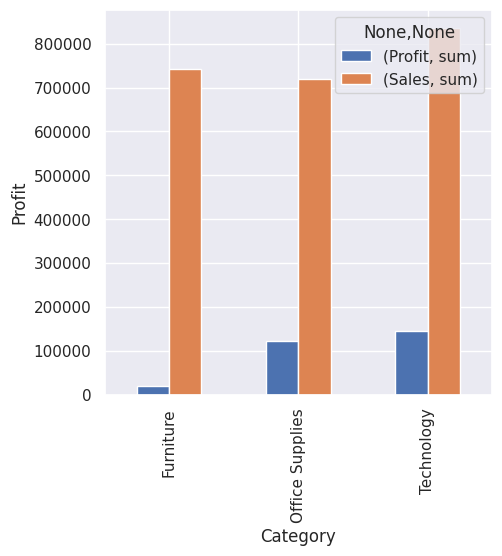

In [67]:
plt.figure(figsize= (15,8))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

<ipython-input-68-c671ca675a1a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 1500x800 with 0 Axes>

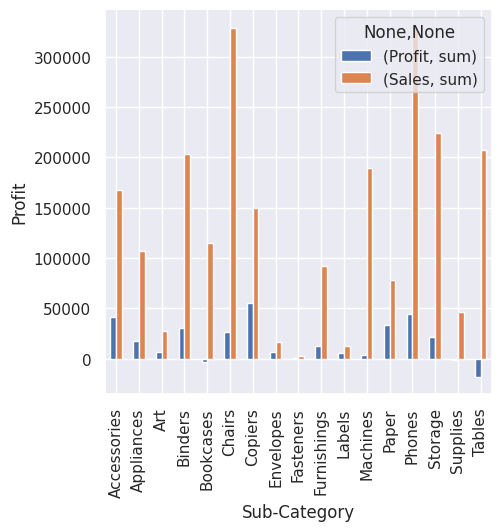

In [68]:
plt.figure(figsize= (15,8))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

<Axes: xlabel='Region'>

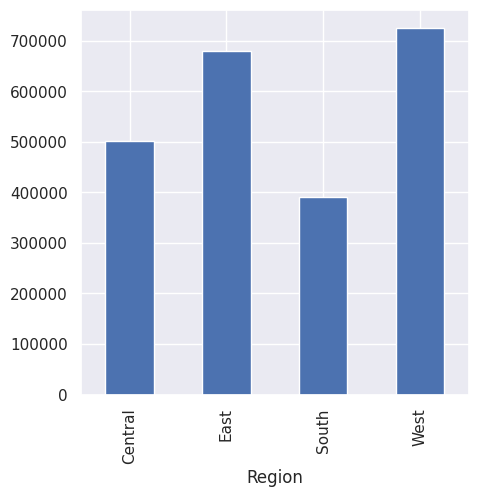

In [69]:
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: xlabel='Region'>

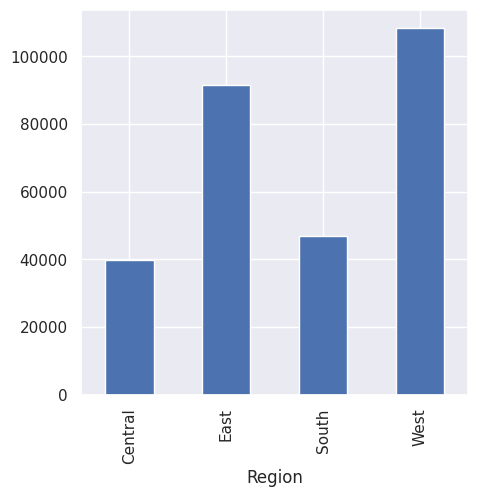

In [70]:
df.groupby("Region")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

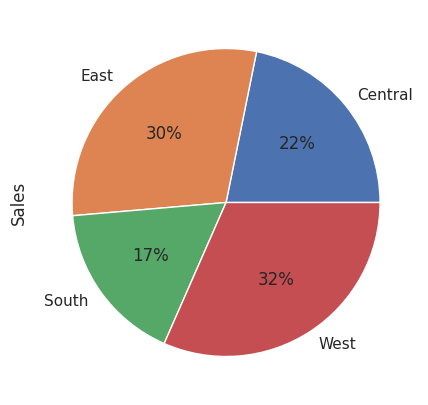

In [71]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

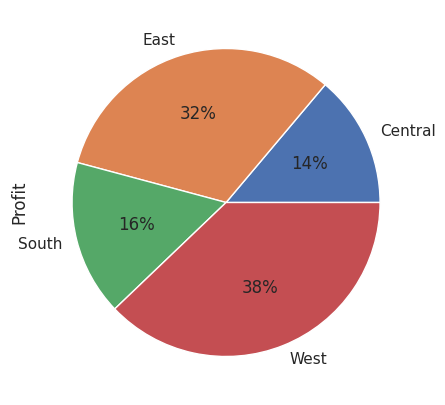

In [72]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='Segment'>

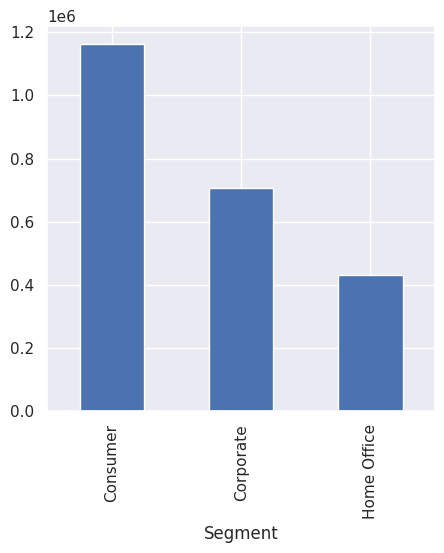

In [73]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<Axes: xlabel='Segment'>

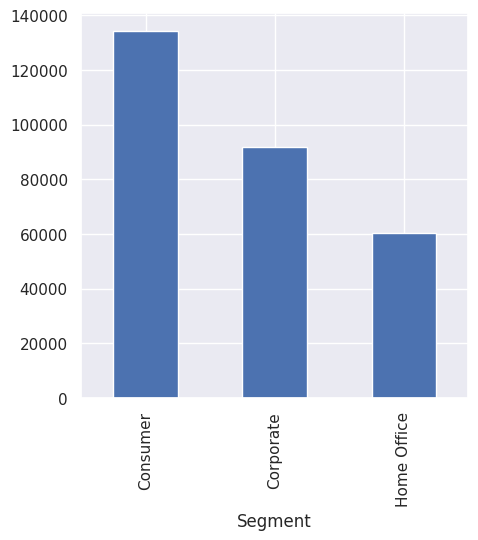

In [74]:
df.groupby("Segment")["Profit"].sum().plot.bar()

<Axes: xlabel='Category'>

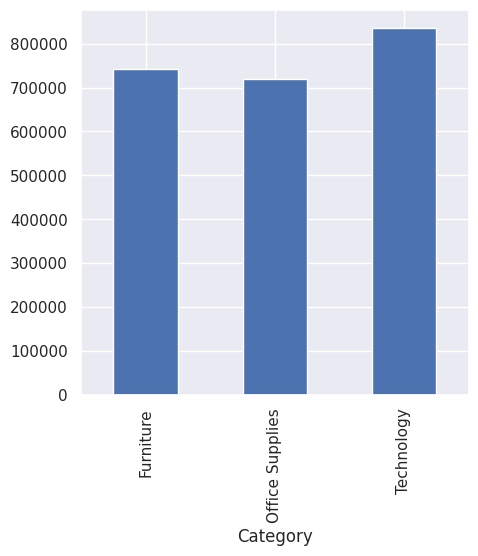

In [75]:
df.groupby("Category")["Sales"].sum().plot.bar()

<Axes: xlabel='Category'>

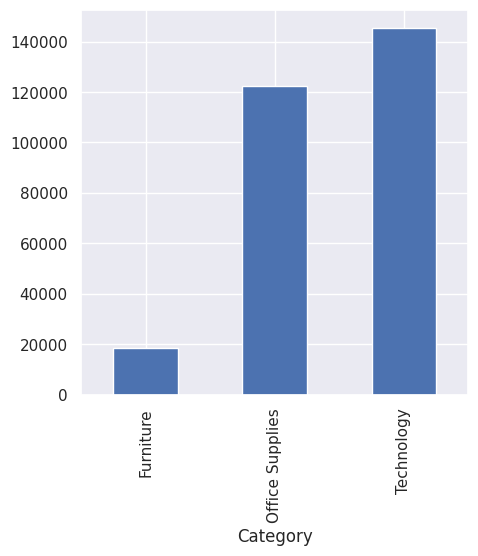

In [76]:
df.groupby("Category")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

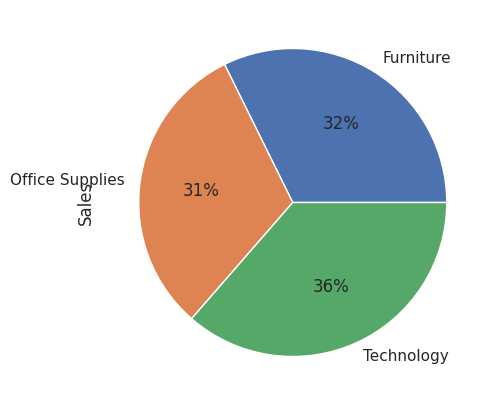

In [77]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

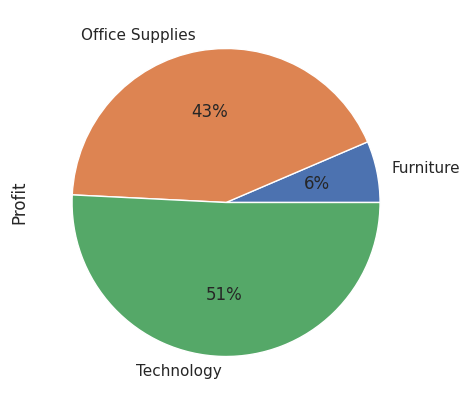

In [78]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='Sales', ylabel='Discount'>

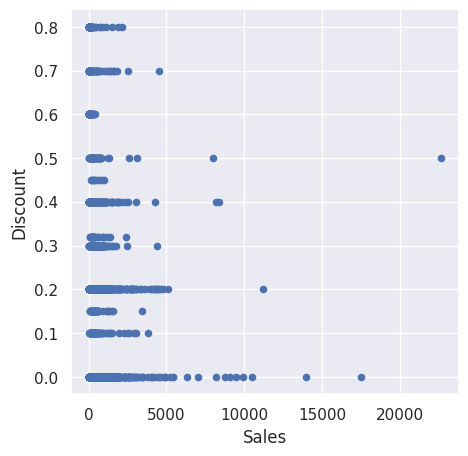

In [79]:

# Sales Analysis based on Discount
df.plot.scatter("Sales","Discount")

<Axes: xlabel='Sales', ylabel='Quantity'>

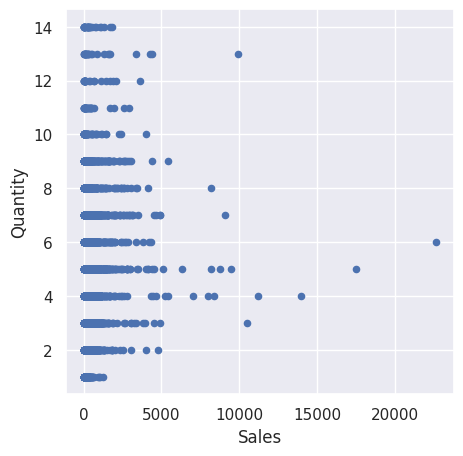

In [80]:

# Sales Analysis based on Quantity
df.plot.scatter("Sales","Quantity")

<Axes: xlabel='State'>

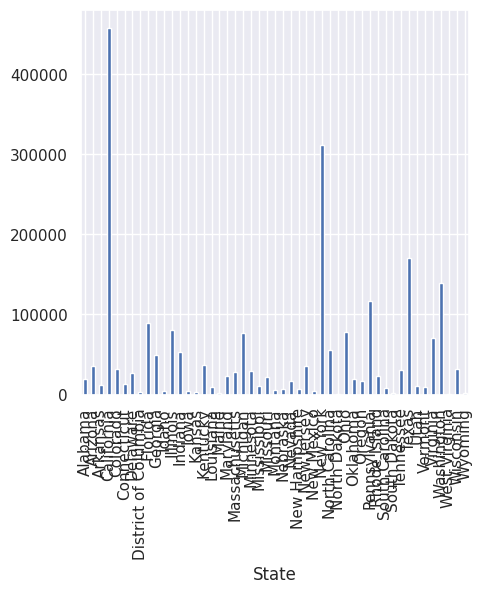

In [81]:
df.groupby("State")["Sales"].sum().plot.bar()

<Axes: xlabel='State'>

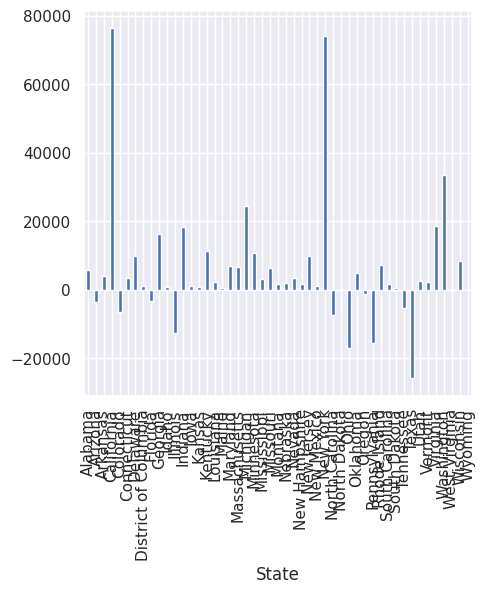

In [82]:
df.groupby("State")["Profit"].sum().plot.bar()

<ipython-input-83-f1f65cc181f1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

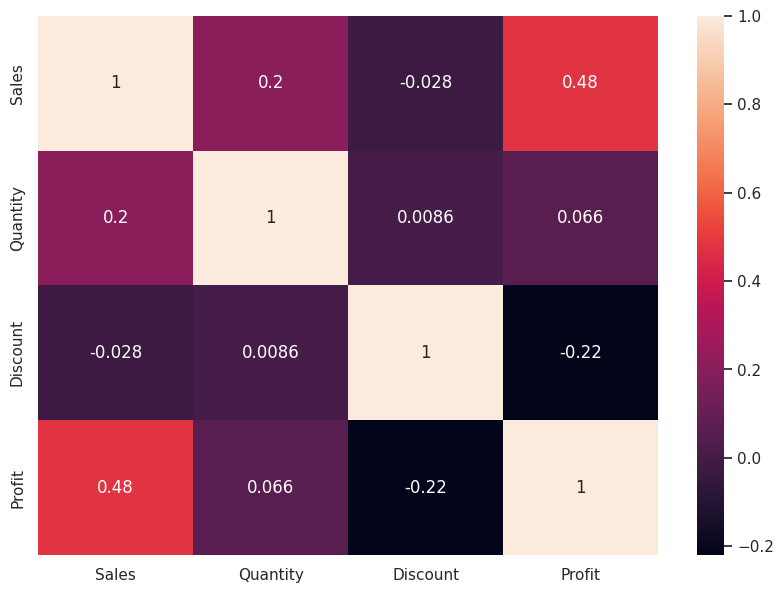

In [83]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

<ipython-input-84-a519274951ce>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 1000x1600 with 0 Axes>

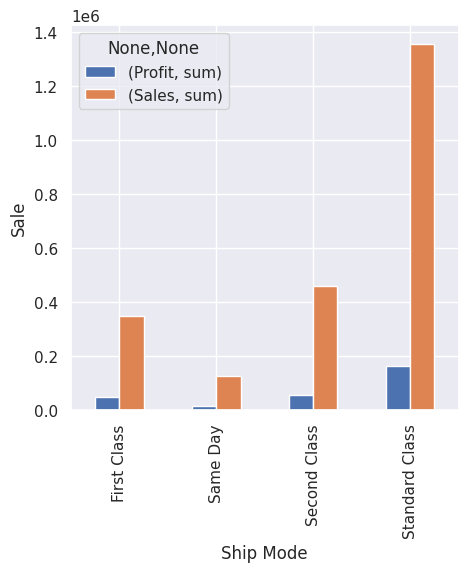

In [84]:
plt.figure(figsize= (10,16))
df.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Sale')
plt.show()

In [85]:
corr = df.corr()
corr['Sales'].sort_values(ascending=False)

<ipython-input-85-9f1e58f13b1e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Sales       1.000000
Profit      0.479064
Quantity    0.200795
Discount   -0.028190
Name: Sales, dtype: float64

# Which region & place generates the most sales?

In [86]:
df_places = df[['Country','City','State','Region']]
df_places.head()

,Country,City,State,Region
0,United States,Henderson,Kentucky,South
1,United States,Henderson,Kentucky,South
2,United States,Los Angeles,California,West
3,United States,Fort Lauderdale,Florida,South
4,United States,Fort Lauderdale,Florida,South


In [87]:
for place in df_places.columns:
    print(place,':',df_places[place].nunique())

Country : 1
City : 531
State : 49
Region : 4


In [88]:
df_places = df[['City','State','Region','Sales','Profit']]
df_places.head()

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164


<ipython-input-89-7424696add22>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_sales = df_places.groupby(['Region'], as_index=False).sum()


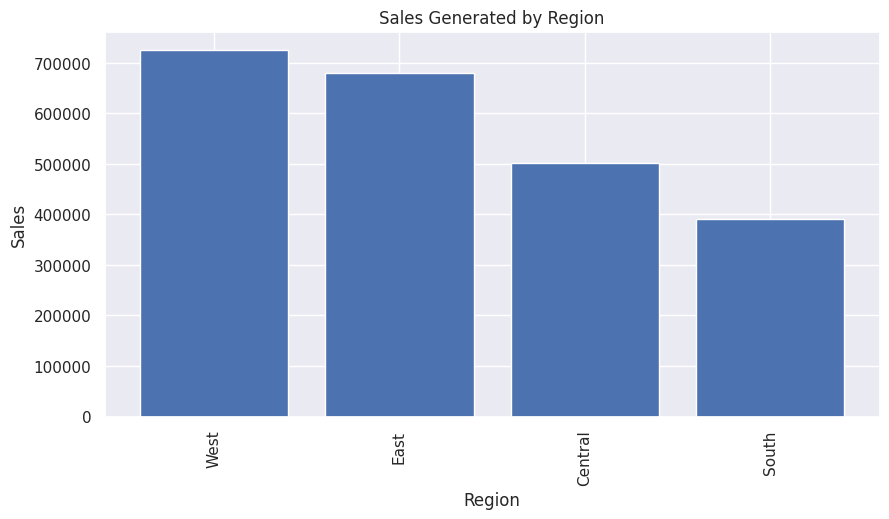

,Region,Sales,Profit
3,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
0,Central,501239.8908,39706.3625
2,South,391721.9050,46749.4303


In [89]:
# Group the data by Region and City and calculate the total sales for each group
region_sales = df_places.groupby(['Region'], as_index=False).sum()
region_sales.sort_values(by='Sales', ascending=False, inplace=True)

# Plot the total sales geProfitnerated by each region and city
plt.figure(figsize=(10,5))
plt.bar(region_sales['Region'], region_sales['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by Region")
plt.xticks(rotation=90)
plt.show()
region_sales

# Sales Insights
The West region contributes to the maximum amount (32%) of sales, followed by the East (30%). South has the minimum sales.

The majority of the Sales opts for the shipping mode Standard Class

The maximum sales occurs in the Consumer Segment (51%), followed by Corporate (31%)

Highest Sales occurs in the New York City, followed by Los Angeles

The State having the highest sales is California, followed by New York

The maximum sales occurs in the Technology category (36%) in the Sub-Category of Phones, followed by Chairs of the category Furniture.

Furniture and Office supplies have nearly equal share of sales.

Sales does not depend upon Discount and Quantity significantly, since the coefficient of correlation between them is negligible (~0). However, Sales is directly dependent on Profit, which is quite obvious. Higher the Sales, more is the Profit generated.

#Conclusion:
The West Region has the maximum amount of Sales followed by the East
The city of Los Angeles in the State of California in the West Region of the United States and New York City in New York in the East contributes to the maximum amount of Sales.
The maximum Sales is encountered in the Sub-Category of Phones in the Category Technology, followed by Chairs in the Category Furniture. However, Furniture and Office supplies have nearly equal share of Sales.

## Profit Analysis

<ipython-input-90-3fd61f89952c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_profit = df_places.groupby(['Region'], as_index=False).sum()


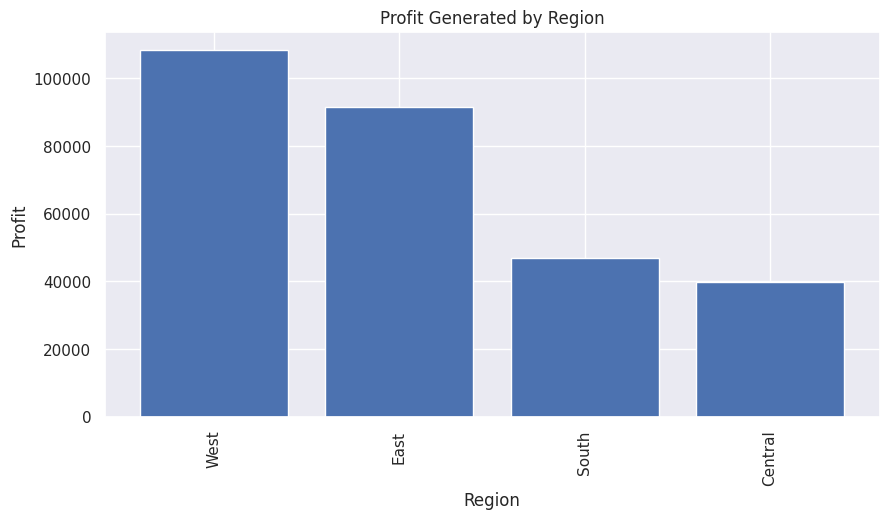

,Region,Sales,Profit
3,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
0,Central,501239.8908,39706.3625


In [90]:
# Group the data by Region and City and calculate the total sales for each group
region_profit = df_places.groupby(['Region'], as_index=False).sum()
region_profit.sort_values(by='Profit', ascending=False, inplace=True)

# Plot the total sales generated by each region and city
plt.figure(figsize=(10,5))
plt.bar(region_profit['Region'], region_profit['Profit'], align='center',)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Profit Generated by Region")
plt.xticks(rotation=90)
plt.show()
region_profit

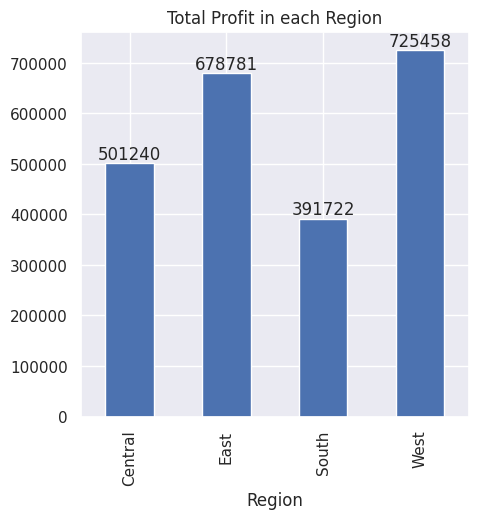

In [91]:
# Profit Analysis based on region
profit_region = df.groupby('Region')['Sales'].sum().plot.bar(figsize=(5,5))
plt.title("Total Profit in each Region")
for container in profit_region.containers:
    profit_region.bar_label(container)

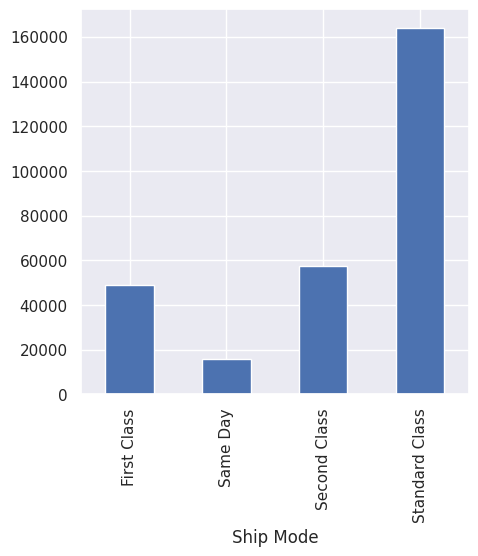

In [92]:
# Profit Analysis based on ship mode
profit_ship = df.groupby('Ship Mode')['Profit'].sum().plot.bar(figsize=(5,5))


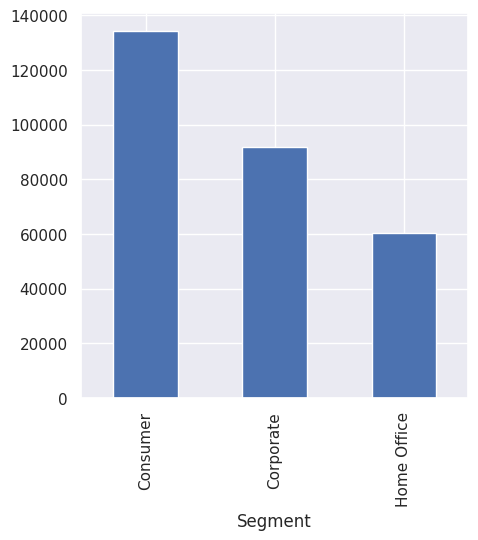

In [93]:

# Profit Analysis based on segment
profit_seg = df.groupby('Segment')['Profit'].sum().plot.bar(figsize=(5,5))



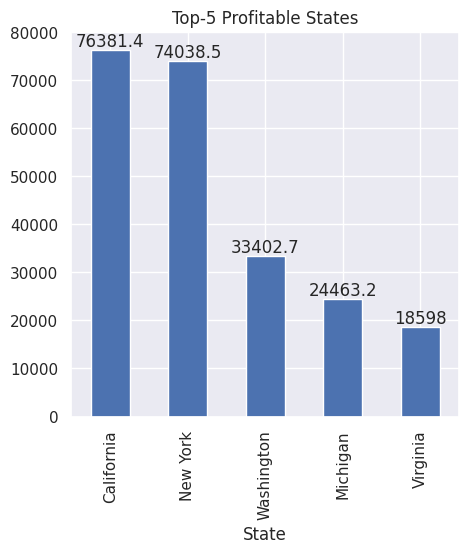

In [94]:
# Profit Analysis based on State- top 5
profit_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 Profitable States")
for container in profit_state.containers:
    profit_state.bar_label(container)

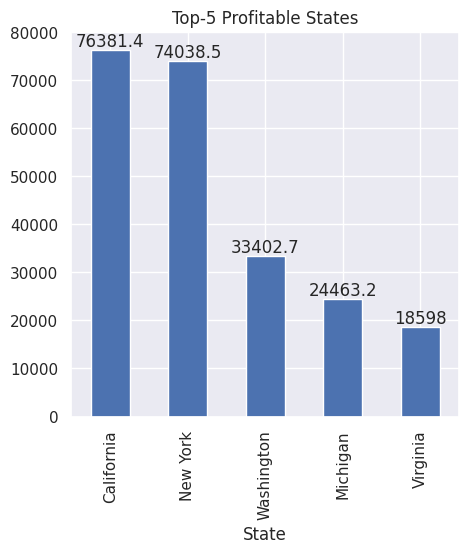

In [95]:

# Profit Analysis based on State- top 5
profit_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 Profitable States")
for container in profit_state.containers:
    profit_state.bar_label(container)

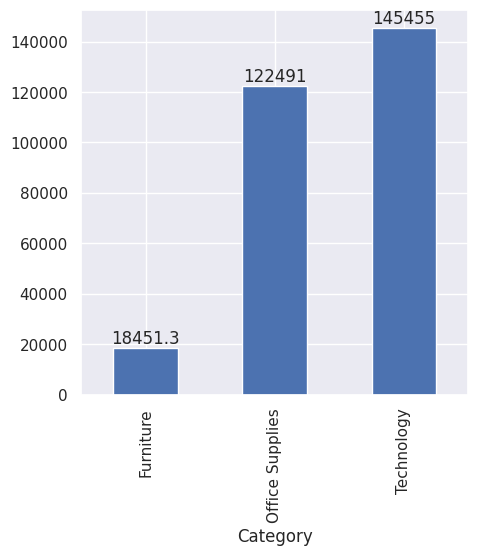

In [96]:

# Profit Analysis based on category
profit_cat = df.groupby('Category')['Profit'].sum().plot.bar(figsize=(5,5))
for container in profit_cat.containers:
    profit_cat.bar_label(container)

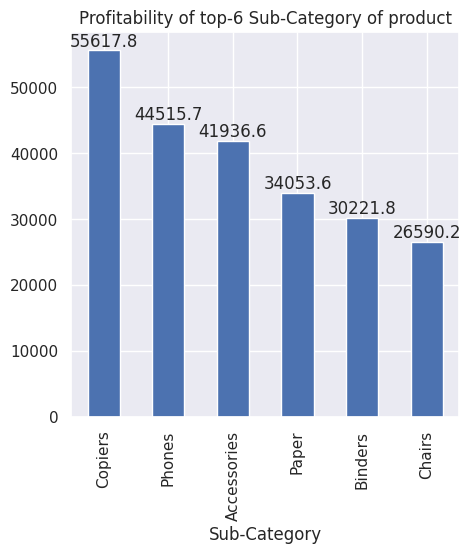

In [97]:

# Profit Analysis based on sub-category
profit_subc = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(6).plot.bar(figsize=(5,5))
plt.title("Profitability of top-6 Sub-Category of product")
for container in profit_subc.containers:
    profit_subc.bar_label(container)


<Axes: xlabel='Profit', ylabel='Discount'>

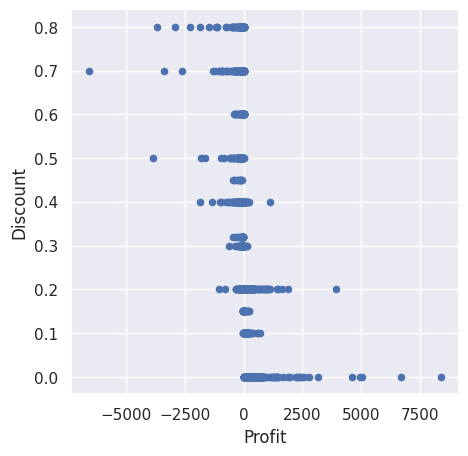

In [98]:
# Profit Analysis based on Discount
df.plot.scatter("Profit","Discount")

<Axes: xlabel='Profit', ylabel='Quantity'>

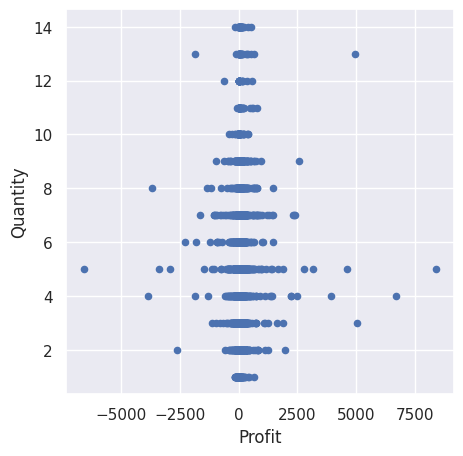

In [99]:

# Profit Analysis based on Quantity
df.plot.scatter("Profit","Quantity")


In [100]:
corr = df.corr()
corr['Profit'].sort_values(ascending=False)

<ipython-input-100-87ab46affd5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Profit      1.000000
Sales       0.479064
Quantity    0.066253
Discount   -0.219487
Name: Profit, dtype: float64

# Profit Insights
The West region contributes to the maximum amount (38%) of profit, followed by the East (32%)

The majority of the Profit is earned from sales which opts for the shipping mode Standard Class

The maximum profit is obtained from the Consumer Segment (47%), followed by Corporate (32%)

Highest Profit is earned in the New York City, followed by Los Angeles and Seattle, which have nearly equal total profit earned.

The State having the highest profit is California and New York, having nearly equal share of Profit

The maximum Profit is incurred from the Technology category (51%) in the Sub-Category of Copiers and Phones, followed by the category Office Supplies (43%).Furniture yields the least profit (6%)

Profit does not depend upon Discount(related inversely) and Quantity, since the coefficient of correlation between them is negligible (~0). However, Profit is directly dependent on Sales, which is quite obvious. Higher the Sales, more is the Profit generated.

#Conclusion:
The West Region contributes to the maximum amount of Profit followed by the East
The city of Los Angeles in the State of California, followed by Seattle in Washington in the West Region of the United States and New York City in New York in the East contributes to the maximum amount of Profit.
The maximum Profit is earned in the Sub-Category of Copiers, followed by Phones in the Category Technology, followed by the Category of Office Supplies. Furniture yields the least amount of Profit, although its sales is high.

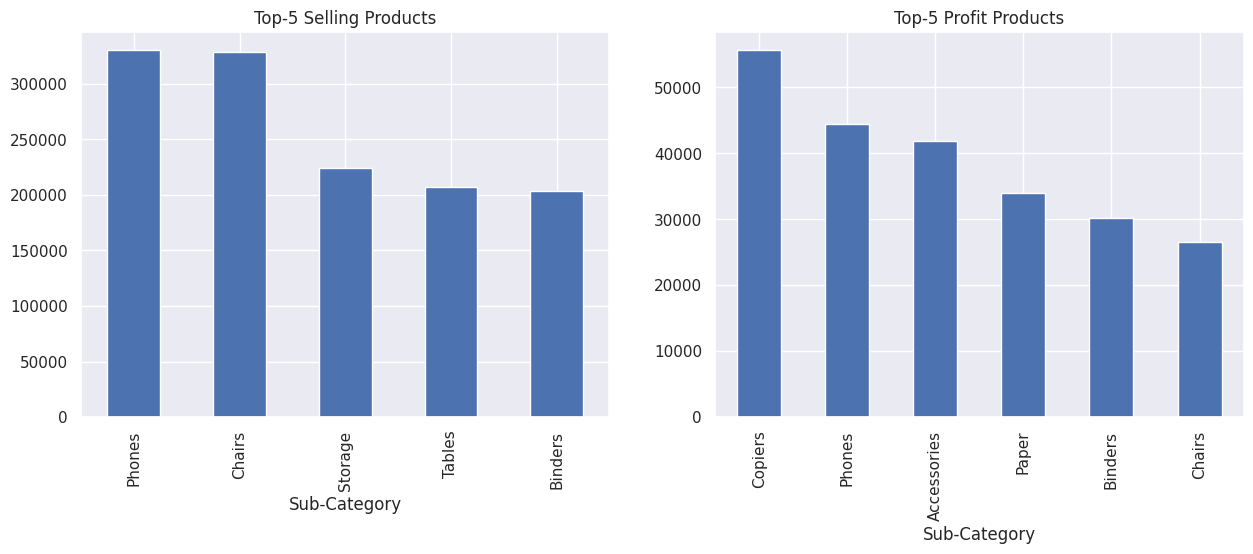

In [101]:

#Comparing the top selling products vs the top profitable products
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))

# Top 5 selling products in the first plot
sales_pdt=df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5).plot(kind="bar",figsize=(15,5),y="Sales",ax=ax1)
ax1.set_title("Top-5 Selling Products")

# Top 5 profit products in the second plot
profit_pdt=df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(6).plot(kind="bar",figsize=(15,5),y="Profit",ax=ax2)
ax2.set_title("Top-5 Profit Products")

plt.show()

<ipython-input-102-215bafa61cc3>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)


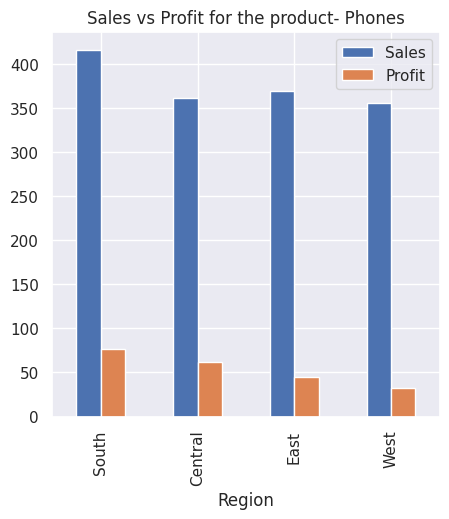

In [102]:

# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Phones"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Phones")
plt.show()

<ipython-input-103-b9e91946d1a6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)


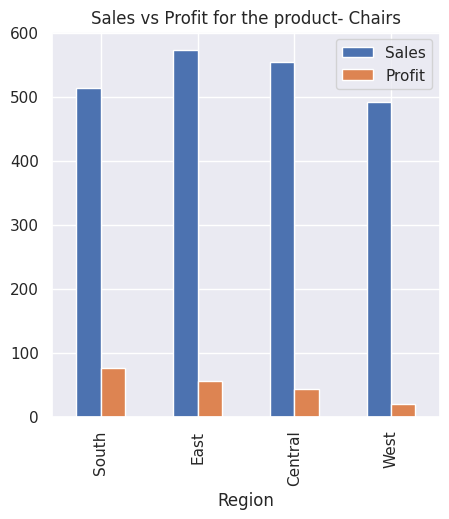

In [103]:

# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Chairs"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Chairs")
plt.show()


<ipython-input-104-f68779a5c795>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)


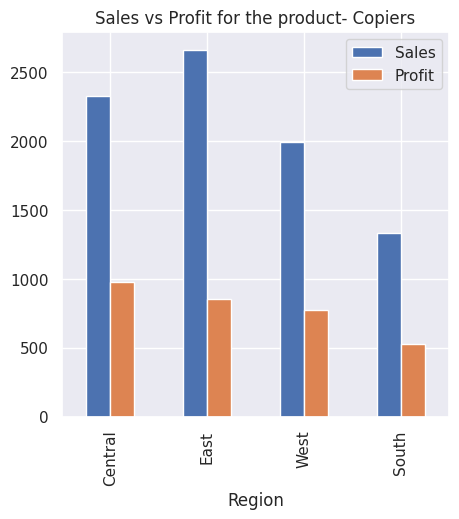

In [104]:
# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Copiers"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Copiers")
plt.show()


<ipython-input-105-7cd30fe1189d>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)


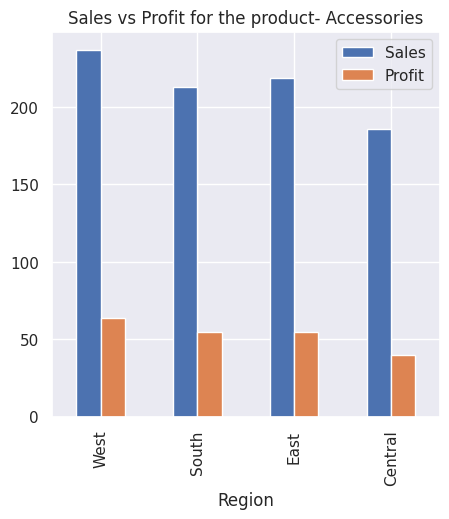

In [105]:

# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Accessories"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Accessories")
plt.show()

# PROFIT MARGIN

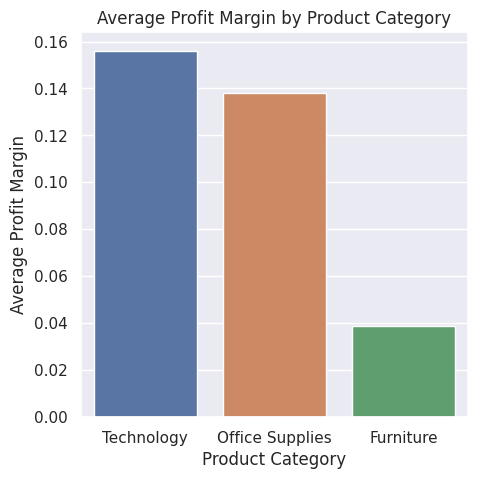

In [106]:

df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product category and calculate the average profit margin for each category
avg_profit_margin_by_category = df.groupby(['Category'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)

# Plot the average profit margin for each category as a bar chart
# avg_profit_margin_by_category.plot(kind='bar')
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Category',y= 'Profit Margin')
# Add a title and labels to the chart
plt.title("Average Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit Margin")

plt.show()


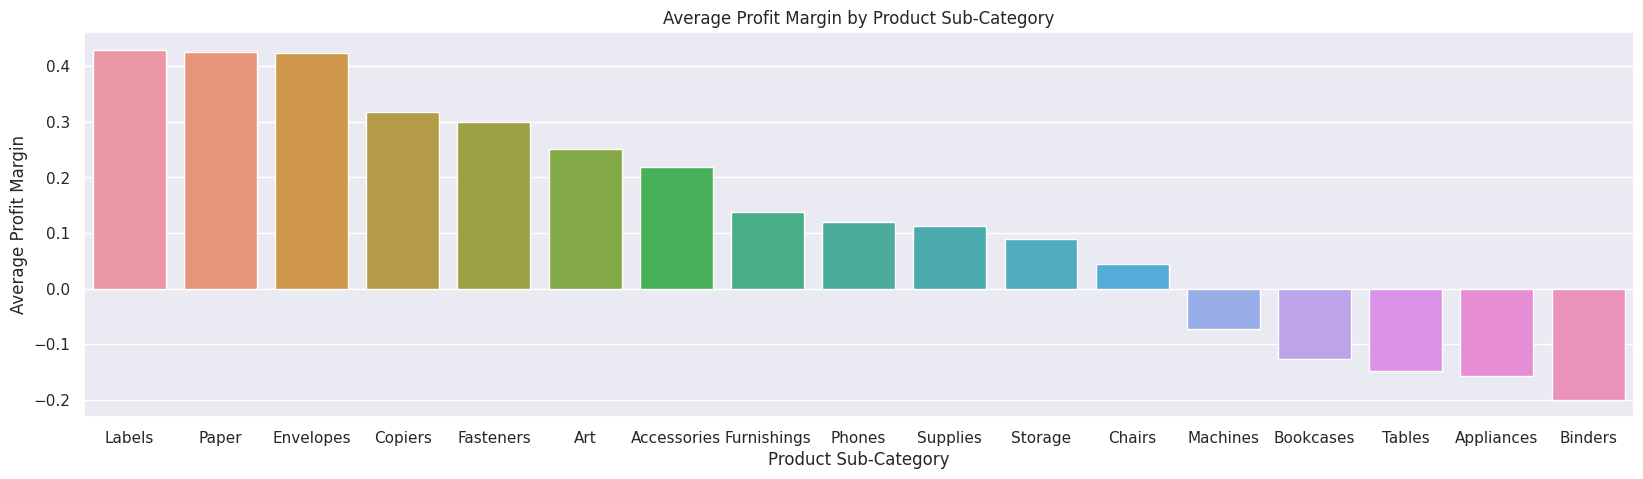

In [107]:

df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product sub-category and calculate the average profit margin for each sub-category
avg_profit_margin_by_category = df.groupby(['Sub-Category'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Sub-Category',y= 'Profit Margin')
plt.title("Average Profit Margin by Product Sub-Category")
plt.xlabel("Product Sub-Category")
plt.ylabel("Average Profit Margin")

plt.show()



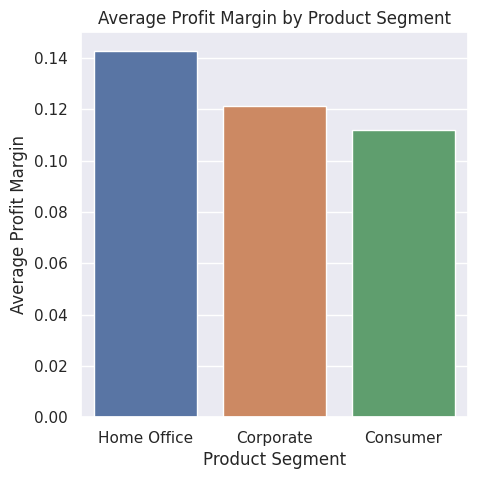

In [108]:

df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product segment and calculate the average profit margin for each segment
avg_profit_margin_by_category = df.groupby(['Segment'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Segment',y= 'Profit Margin')
plt.title("Average Profit Margin by Product Segment")
plt.xlabel("Product Segment")
plt.ylabel("Average Profit Margin")

plt.show()

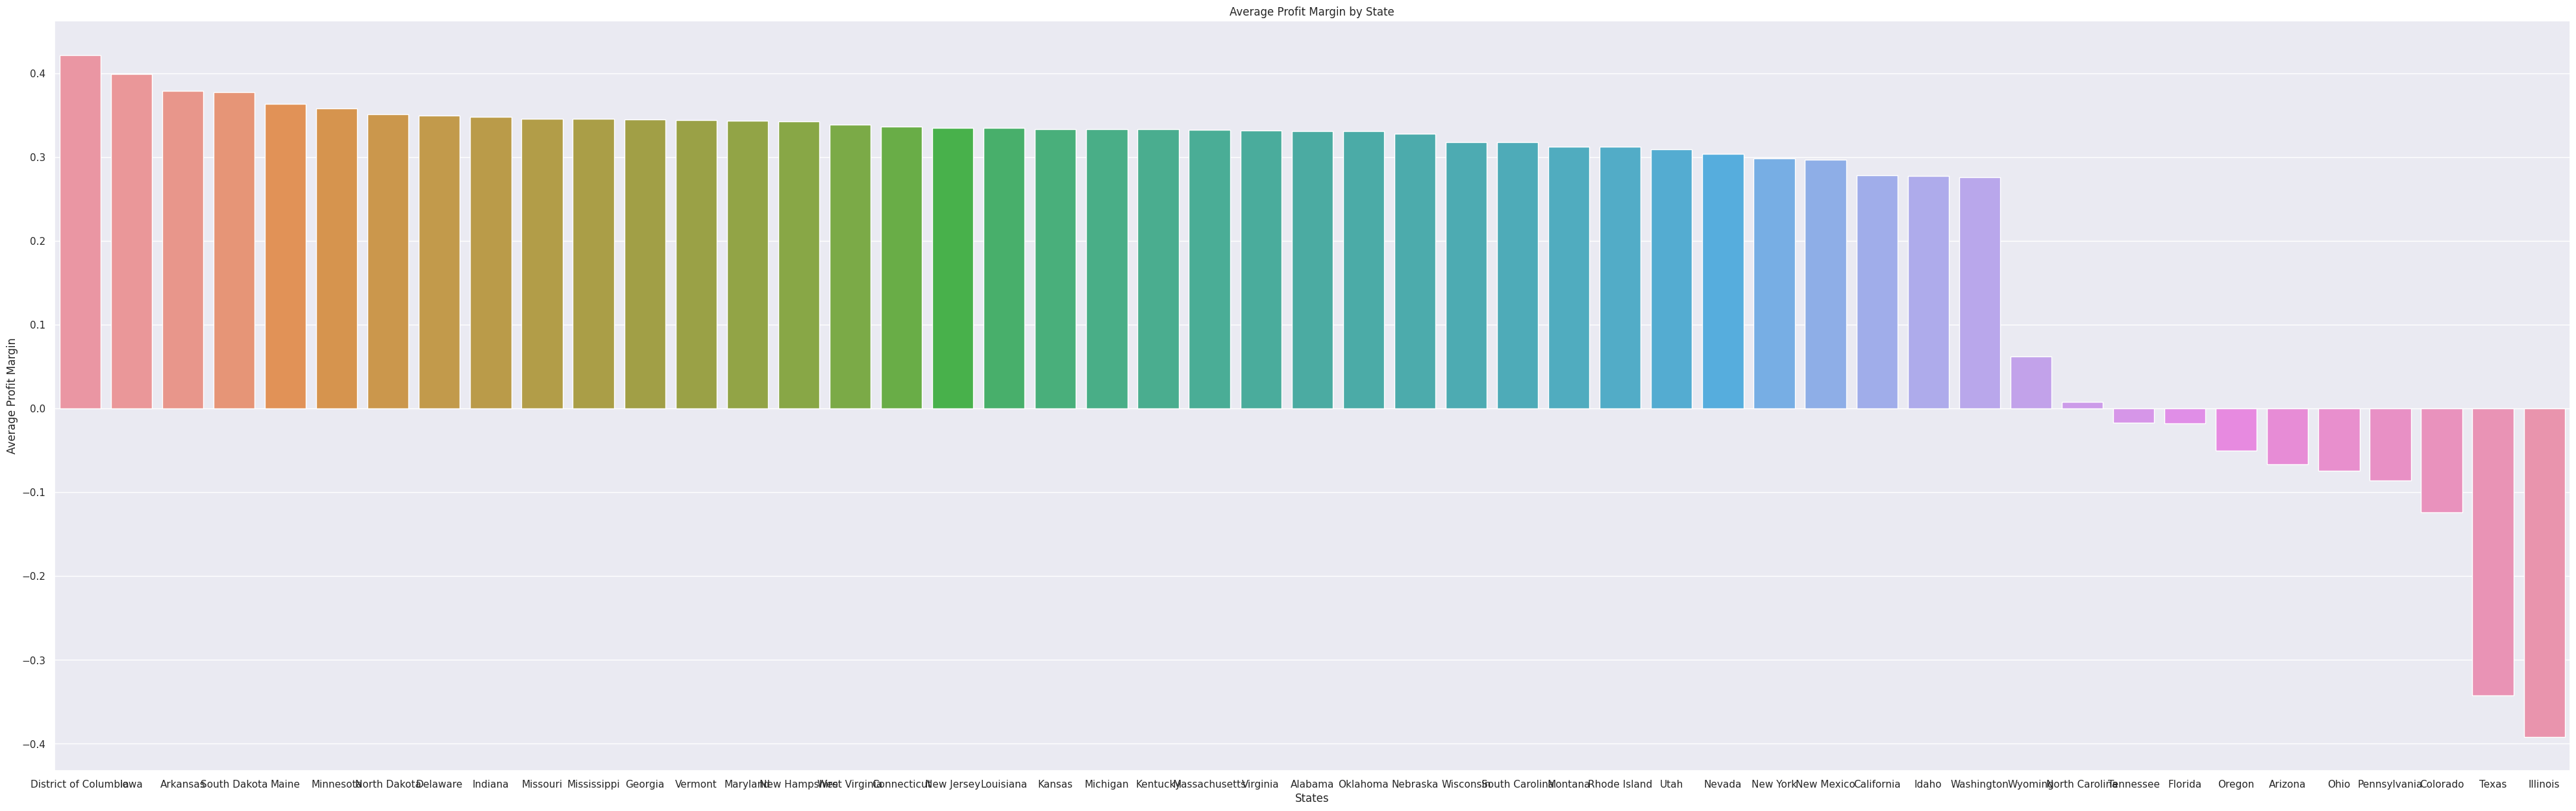

In [109]:

df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by state and calculate the average profit margin for each state
avg_profit_margin_by_category = df.groupby(['State'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False).head(50)
sns.set(rc={'figure.figsize':(50,15)})
sns.barplot(data = avg_profit_margin_by_category, x = 'State',y= 'Profit Margin')
plt.title("Average Profit Margin by State")
plt.xlabel("States")
plt.ylabel("Average Profit Margin")

plt.show()

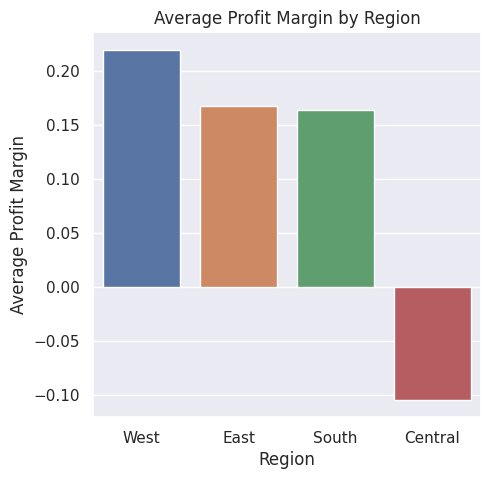

In [110]:

df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by region and calculate the average profit margin for each region
avg_profit_margin_by_category = df.groupby(['Region'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False).head(50)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Region',y= 'Profit Margin')
plt.title("Average Profit Margin by Region")
plt.xlabel("Region")
plt.ylabel("Average Profit Margin")

plt.show()


# Results of Analysis:
Sale of products in the Technology Category results in Maximum Profit Margin, more specifically Copiers, Fasteners, Accessories and Phones, followed by Office Supplies including Labels, Papers and Envelopes. Chairs are the only product in the Furniture Category which is profitable, other products of this category results in Loss

The Segment- Home Office is the most profitable, followed by Corporate

Sales in the West Region has the Highest Profitability, followed by the East while that in the Central Region suffers the Highest Loss